In [1]:
from f_train import *
from f_drosophila_infer import *
from f_data_prep import *
import seaborn as sns

In [9]:
raw_data = np.loadtxt('../dmel_data.txt').T  # transpose the data so that the shape is 6078 cells x (3+6*99) columns
gene_exp = np.copy(raw_data[:,3:])  # excluding (x,y,z) coordinates)
n_cell = gene_exp.shape[0]  # number of cells
print("# of cells: ", n_cell)

all_data = np.vstack([gene_exp[:, i::6] for i in range(6)])
all_bin = np.vsplit(all_data, 6)

xyz = raw_data[:,:3]
sxlabels = ['x', 'y', 'z']

# of cells:  6078


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


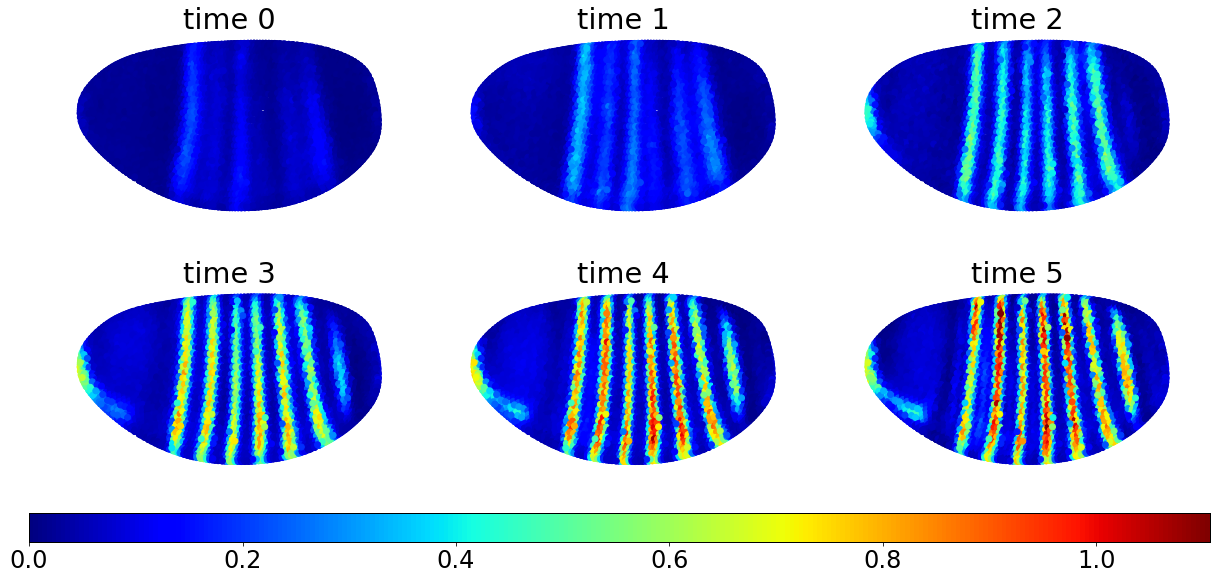

In [10]:
matplotlib.rcParams.update({'font.size':24})

import matplotlib.cm

fig = plt.figure(figsize=(20,8))
plt.subplots_adjust(hspace=0.4)
for i in range(6):
    ax = fig.add_subplot(2,3,i+1)
    norm = plt.Normalize(np.min(all_data[:,54]), np.max(all_data[:,54]))
    ax.axis('off')
    xy= ax.scatter(xyz[:,0], xyz[:,2],
                c = all_bin[i][:,74],
                norm = norm, cmap=plt.cm.jet)
    ax.set_title('time %s' % i)
    
    cbar_ax = fig.add_axes([0.1, 0, 0.82, 0.05])
    fig.colorbar(xy, cax=cbar_ax, orientation='horizontal')
# plt.savefig('./paper/bigpicture.pdf', bbox_inches='tight')
plt.show()

In [4]:
# fig = plt.figure(figsize=(26,2.5))
# plt.subplots_adjust(bottom=0.25, hspace=0.8)
# for i in range(6):
#     ax = fig.add_subplot(1,6,i+1)
#     norm = plt.Normalize(np.min(all_data[:,54]), np.max(all_data[:,54]))
#     ax.axis('off')
#     xy= ax.scatter(xyz[:,0], xyz[:,2],
#                 c = all_bin[i][:,54], s=10,
#                 norm = norm, cmap=plt.cm.jet)
#     ax.set_title('time %s' % i)
    
#     cbar_ax = fig.add_axes([0.1, 0, 0.82, 0.1])
#     fig.colorbar(xy, cax=cbar_ax, orientation='horizontal')
# plt.savefig('./paper/bigpicture_2.pdf', bbox_inches='tight')
# plt.show()

In [5]:
# with open('./pickles/train_cell_ind.pkl', 'rb') as f:
#     train_cell_ind = pickle.load(f)
# test_cell_ind = [ i for i in range(6078) if i not in set(list(train_cell_ind))]

In [6]:
# xyz = np.copy(xyz[np.hstack((train_cell_ind, test_cell_ind)),:])

In [7]:
# data_all = np.loadtxt('../data_complete.txt')
# all_bin = np.vsplit(data_all, 6)

In [8]:
# fig = plt.figure(figsize=(20,8))
# plt.subplots_adjust(hspace=0.4)
# for i in range(6):
#     ax = fig.add_subplot(2,3,i+1)
#     norm = plt.Normalize(np.min(all_data[:,95]), np.max(all_data[:,95]))
#     ax.axis('off')
#     xy= ax.scatter(xyz[:,0], xyz[:,2],
#                 c = all_bin[i][:,96],
#                 norm = norm, cmap=plt.cm.jet)
#     ax.set_title('time %s' % i)
    
#     cbar_ax = fig.add_axes([0.1, 0, 0.8, 0.05])
#     fig.colorbar(xy, cax=cbar_ax, orientation='horizontal')
# # plt.savefig('./paper/bigpicture.pdf', bbox_inches='tight')
# plt.show()

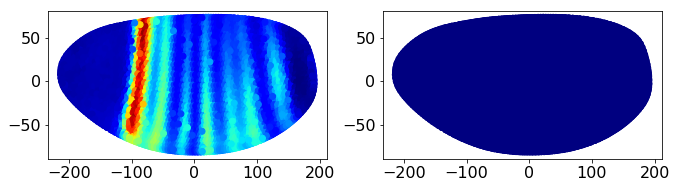

In [10]:
fig = plt.figure(figsize=(11,6))
ax1 = fig.add_subplot(221)
ax1.scatter(xyz[:,0], xyz[:,2], c = all_bin[0][:,54], cmap=plt.cm.jet)
ax2 = fig.add_subplot(222)
ax2.scatter(xyz[:,0], xyz[:,2], c=all_bin[0][:,0], cmap=plt.cm.jet)

In [2]:
with open('./pickles/names.pkl', 'rb') as f:
    names = pickle.load(f)

In [101]:
genes=np.sort(np.hstack((np.where(np.array(names) == 'Ama'),
np.where(np.array(names) == 'brk'),
np.where(np.array(names) == 'ftz'),
np.where(np.array(names) == 'noc'),
np.where(np.array(names) == 'Kr'),
np.where(np.array(names) == 'htl'))))

In [102]:
genes[0]

array([ 1, 29, 40, 57, 63, 70])

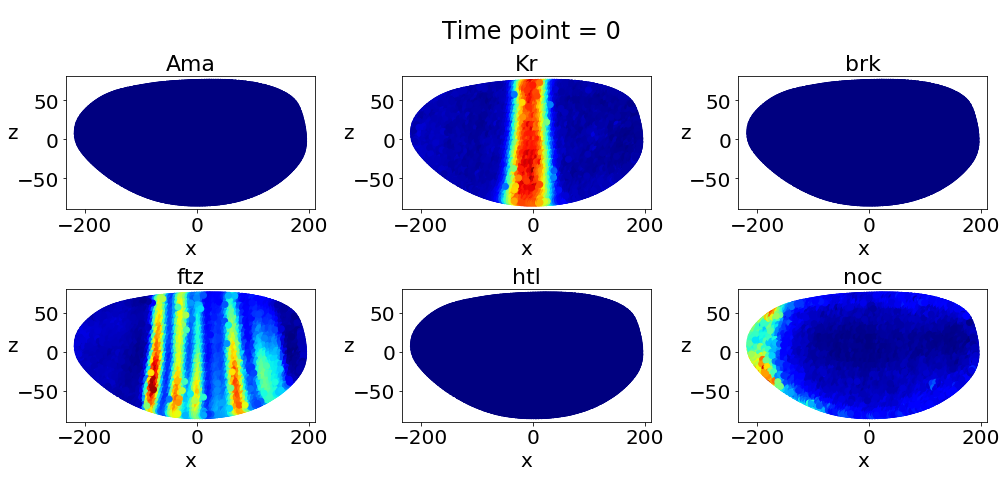

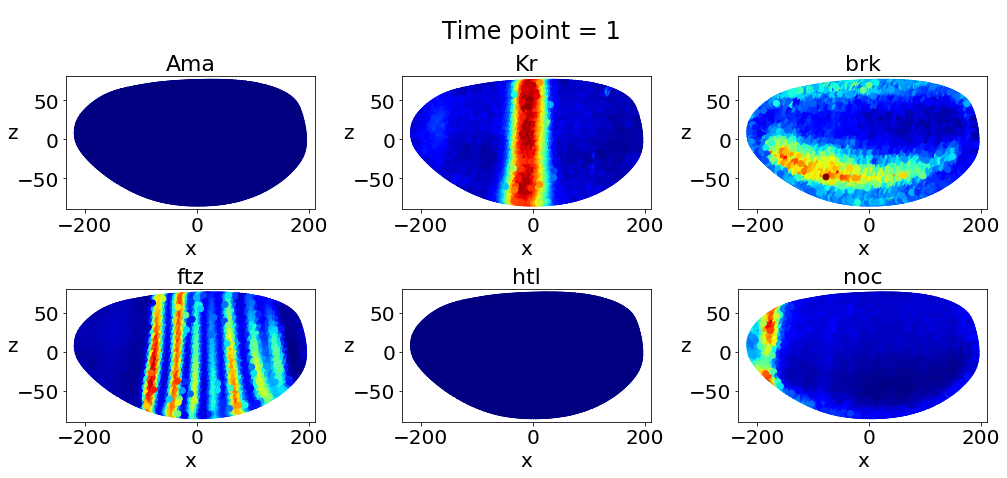

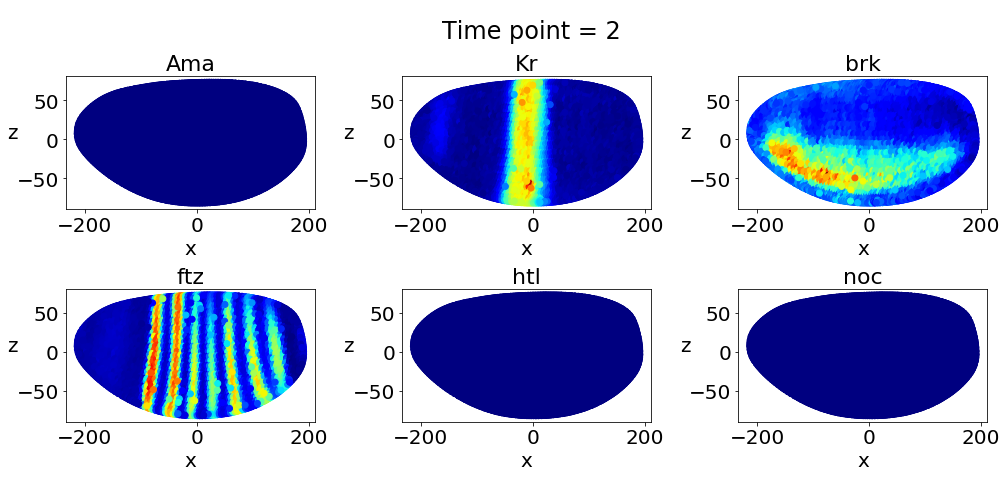

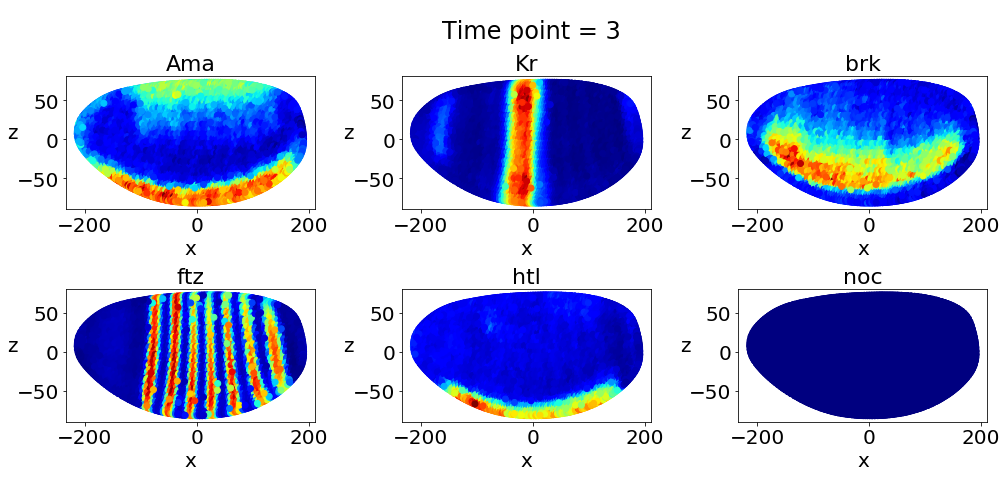

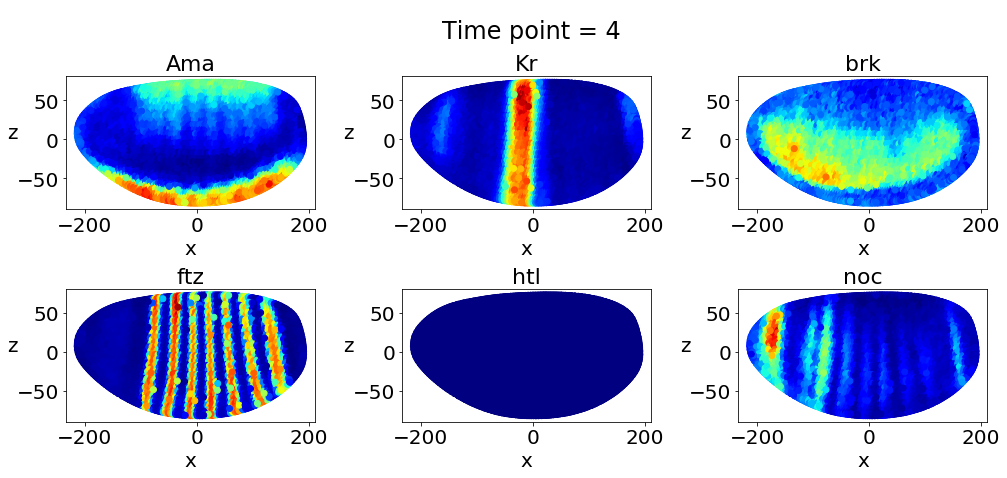

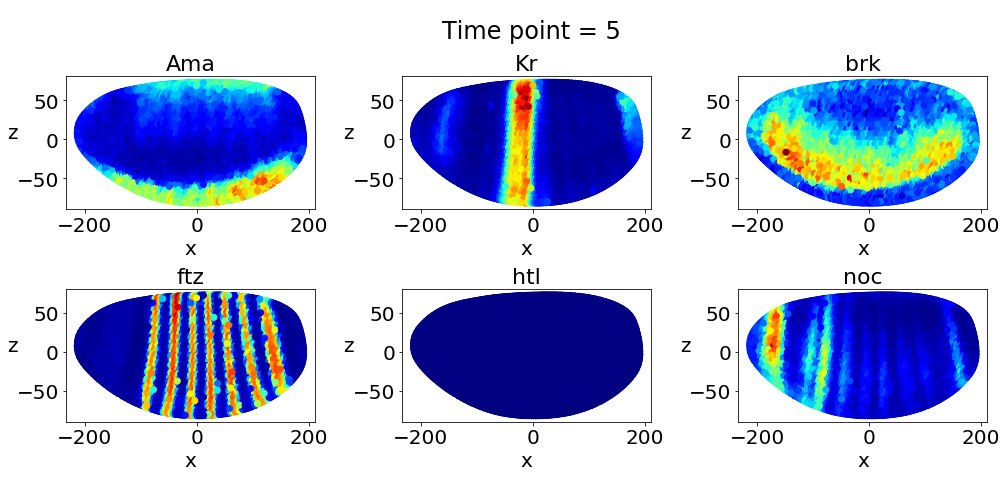

In [103]:
matplotlib.rcParams.update({'font.size':20})
for j in range(6):
    fig = plt.figure(figsize=(16, 6))
    for i in range(6):
        plt.subplots_adjust(left=0.1, right=0.9, wspace=0.35, hspace=0.6, bottom=0.1, top=0.9)
        ax = fig.add_subplot(2,3,i+1)
        ax.scatter(xyz[:,0], xyz[:,2], c=all_bin[j][:,genes[0][i]], cmap=plt.cm.jet)
        ax.set_title(names[genes[0][i]], fontsize=22)
        ax.set_xlabel('x')
        ax.set_ylabel('z', rotation=0)
    plt.text(0.35, 1.4, 'Time point = %s' % j,
         horizontalalignment='center', fontsize=24, transform=ax2.transAxes)
    plt.savefig('./movie_frames/big_picture_%s.png' % j, bbox_inches='tight')
    plt.show()